In [1]:
import pandas as pd

In [27]:
railroad_lines = pd.read_csv("out.csv")
railroad_crossings = pd.read_csv("Railroad_Crossings.csv")

C:\Users\Jitendra Savanur\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jitendra Savanur\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
railroad_lines.columns

Index(['CTFIPS', 'FRAARCID', 'FRAREGION', 'FRFRANODE', 'MILES', 'NET',
       'OBJECTID', 'OLD_FRAID', 'PASSNGR', 'RROWNER1', 'RROWNER2', 'RROWNER3',
       'STATE', 'STCYFIPS', 'STFIPS', 'STRACNET', 'SUBDIV', 'ShapeSTLength',
       'Shape_Le_1', 'Shape_Leng', 'TOFRANODE', 'TRACKS', 'TRKRGHTS1',
       'TRKRGHTS2', 'TRKRGHTS3', 'TRKRGHTS4', 'TRKRGHTS5', 'TRKRGHTS6',
       'TRKRGHTS7', 'TRKRGHTS8', 'TRKRGHTS9', 'YARD', 'end', 'internmediate',
       'start'],
      dtype='object')

In [39]:
railroad_lines_CT = railroad_lines[railroad_lines["STATE"] == "CT"]
print("CT Lines: ",len(railroad_lines_CT))
railroad_crossings_CT = railroad_crossings[railroad_crossings["StateCode"] == 9]
print("CT Crossings: ",len(railroad_crossings_CT))

CT Lines:  776
CT Crossings:  1202


In [40]:
from haversine import haversine

In [42]:
segment_to_crossing = {}
segment_to_crossing_count = {}
crossing_to_segment = {}

for crossing_index, crossing_row in railroad_crossings_CT.iterrows():
    
    mindist = float("inf")
    min_segment = ""
    
    crossing_lat_long = (float(crossing_row["LATITUDE"]), float(crossing_row["LONGITUD"]))
    #print(crossing_lat_long)
    crossing_object_id = crossing_row["OBJECTID"]
    
    for lines_index, lines_row in railroad_lines_CT.iterrows():
        coord_list = []
        start = lines_row["start"]
        coord_list.append((float(start.split(",")[1]),float(start.split(",")[0])))
        end = lines_row["end"]
        coord_list.append((float(end.split(",")[1]),float(end.split(",")[0])))
        
        intermediates = lines_row["internmediate"]
        try:
            if ";" in intermediates:
                intermediate_coords = intermediates.split(";")
            else:
                intermediate_coords = [intermediates]
        except TypeError:
            intermediate_coords = []
        
        for intermediate_coord in intermediate_coords:
            coord_list.append((float(intermediate_coord.split(",")[1]),float(intermediate_coord.split(",")[0])))
        #print(coord_list)
        
        for coord in coord_list:
            dist = haversine(coord, crossing_lat_long, miles=True)
            
            if dist < mindist:
                #print(dist)
                mindist = dist
                #print("coord:",coord)
                min_segment = lines_row["OBJECTID"]
                
    
    crossing_to_segment[crossing_object_id] = min_segment
    try:
        segment_to_crossing_count[min_segment] += 1
    except KeyError:
        segment_to_crossing_count[min_segment] = 1
    
    try:
        segment_to_crossing[min_segment].append(crossing_object_id)
    except KeyError:
        segment_to_crossing[min_segment] = [crossing_object_id]

In [43]:
segment_to_crossing_count

{74252: 7,
 74253: 9,
 74254: 6,
 74255: 2,
 74256: 4,
 74257: 3,
 74258: 2,
 74259: 1,
 74261: 2,
 74262: 5,
 74263: 3,
 74264: 1,
 74265: 8,
 74266: 13,
 74267: 5,
 74269: 10,
 74270: 7,
 74271: 6,
 74272: 16,
 74279: 6,
 74280: 2,
 74282: 3,
 74284: 2,
 74285: 1,
 74286: 6,
 74288: 1,
 74290: 2,
 74292: 13,
 74293: 2,
 74296: 9,
 74297: 6,
 74298: 8,
 74301: 3,
 74302: 2,
 74303: 6,
 74304: 4,
 74305: 6,
 74306: 10,
 74307: 1,
 74308: 2,
 74310: 3,
 74311: 1,
 74312: 3,
 74314: 3,
 74315: 1,
 74316: 12,
 74320: 5,
 74321: 1,
 74322: 10,
 74323: 3,
 74326: 10,
 74327: 8,
 74328: 13,
 74329: 2,
 74331: 8,
 74332: 4,
 74333: 1,
 74334: 1,
 74335: 1,
 74336: 1,
 74337: 6,
 74338: 1,
 74339: 1,
 74340: 1,
 74341: 2,
 74342: 6,
 74344: 3,
 74345: 13,
 74346: 7,
 74347: 4,
 74349: 5,
 74352: 12,
 74356: 2,
 74357: 7,
 74358: 1,
 74361: 2,
 74362: 8,
 74363: 3,
 74364: 12,
 74365: 9,
 74366: 1,
 74367: 1,
 74368: 1,
 74369: 9,
 74370: 5,
 74371: 9,
 74372: 4,
 74373: 1,
 74374: 1,
 74375: 7

In [37]:
crossing_to_segment

{1001: 80160}

In [ ]:

coords = "-96.582594032577589,46.05823342925234 -96.582447767984718,46.05823272297966 -96.581278115670699,46.058227070304191 -96.58105035322032,46.058225968194506 -96.578261077076604,46.058212486049733 -96.576791585087065,46.058205382800821 -96.575681041020431,46.058200013753883 -96.575401764680066,46.058198666037612 -96.57362915775748,46.058190097877699 -96.573220666848329,46.058178763842669 -96.571899158827122,46.058142096833272 -96.571727778237218,46.058123422026377 -96.570676110652641,46.058008812881241 -96.570591404911227,46.057999582051906 -96.57046356476485,46.057985649780264 -96.569660159185432,46.057898098307398 -96.563686985976858,46.057144989951667 -96.560502505905347,46.056743484805025 -96.560069052611084,46.056688834751661"
coords = coords.split(" ")
points = []
for coord in coords:
    point = []
    point.append(float(coord.split(",")[1]))
    point.append(float(coord.split(",")[0]))
    points.append(point)

folium.Marker([41.7376944, -73.4689722], popup = "").add_to(my_map)

In [21]:
haversine((40.7128,-74.0060),(40.9257, -73.1409))

76.54991035321635

In [44]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import math

In [50]:
railroad_lines.columns
CT_railroad_lines = railroad_lines[railroad_lines["STATE"] == "CT"]
CT_railroad_lines.to_csv("CT_railroad_lines.csv")

In [51]:
import networkx as nx
#G=nx.Graph()
G=nx.MultiGraph()
for index, row in CT_railroad_lines.iterrows():
    G.add_edge(row["start"], row["end"], weight = float(row["MILES"]), key=row["OBJECTID"])

In [52]:
src = "-72.624948810747753,41.938546918291664"
tgt = "-73.089256413411732,41.317474504919659"
p = nx.dijkstra_path(G, source=src, target=tgt)

In [53]:
len(p)

60

In [59]:
CT_center = [41.6032, -73.0877]
my_map = folium.Map(location = CT_center, zoom_start = 4)

segments_on_shortest_path = []
all_points = []
i = 0
while i < len(p) - 1:
    #print(i)
    node = CT_railroad_lines[CT_railroad_lines["start"] == p[i]]
    node = node[node["end"] == p[i + 1]]
    node = node[node["MILES"] == node["MILES"].min()]
    flip = False
    if len(node) > 1:
        node = node.loc[[0]]
        #print("Multiple paths found for same node pair")
        #for index, row in node.iterrows():
         #   print(row["MILES"])
    elif len(node) == 0:
        #print("Zero paths found for same node pair. Flipping start and end and checking again.")
        node = CT_railroad_lines[CT_railroad_lines["end"] == p[i]]
        node = node[node["start"] == p[i + 1]]
        node = node[node["MILES"] == node["MILES"].min()]
        flip = True
        #print(len(node))
    
    node.internmediate.fillna("")
    
    for index, row in node.iterrows():
        segments_on_shortest_path.append(row["OBJECTID"])
        if flip == True:
            end = row["start"]
            start = row["end"]
        else:
            start = row["start"]
            end = row["end"]
        intermediates = row["internmediate"]

        #if math.isnan(intermediates):
        #    intermediate_coords = []
        #else:
        try:
            if ";" in intermediates:
                intermediate_coords = intermediates.split(";")
            else:
                intermediate_coords = [intermediates]
        except TypeError:
            intermediate_coords = []
            
        
        
        coords = []
        coords.append(float(start.split(",")[1]))
        coords.append(float(start.split(",")[0]))
        #folium.Marker(coords, popup = str(row["OBJECTID"])).add_to(my_map)
        all_points.append(coords)
        #print("start:",start)
        
        #print(intermediates)
        if flip == True:
            intermediate_coords.reverse()

        for intermediate_coord in intermediate_coords:
            coords = []
            coords.append(float(intermediate_coord.split(",")[1]))
            coords.append(float(intermediate_coord.split(",")[0]))
            #folium.Marker(coords, popup = str(row["OBJECTID"])).add_to(my_map)
            all_points.append(coords)
        
        coords = []
        coords.append(float(end.split(",")[1]))
        coords.append(float(end.split(",")[0]))
        #folium.Marker(coords, popup = str(row["OBJECTID"])).add_to(my_map)
        all_points.append(coords)
        #print("end:",end)
    i += 1
    
coords = []
coords.append(float(src.split(",")[1]))
coords.append(float(src.split(",")[0]))
folium.Marker(coords, popup = "source").add_to(my_map)

coords = []
coords.append(float(tgt.split(",")[1]))
coords.append(float(tgt.split(",")[0]))
folium.Marker(coords, popup = "destination").add_to(my_map)

folium.PolyLine(all_points, color="red", weight=4.0, opacity=1).add_to(my_map)
#node0 = ND_railroad_lines[ND_railroad_lines["start"] == p[0]]
#node0 = node0[node0["end"] == p[1]]

In [57]:
my_map

In [60]:
segments_on_shortest_path

[74389,
 75917,
 74282,
 74284,
 74356,
 78198,
 78182,
 74391,
 74390,
 78200,
 74403,
 74384,
 74369,
 74292,
 77501,
 74300,
 74361,
 74508,
 74363,
 74506,
 77505,
 74299,
 74298,
 74438,
 74437,
 74297,
 74296,
 74405,
 74411,
 78192,
 74293,
 222819,
 77507,
 231544,
 80079,
 80150,
 80170,
 80152,
 80149,
 80162,
 80151,
 80190,
 80189,
 80165,
 84844,
 80199,
 80181,
 80183,
 80182,
 84557,
 80184,
 84558,
 80153,
 80185,
 80186,
 80188,
 80187,
 80174,
 80164]

In [62]:
import collections
CT_segment_to_crossing_count = collections.OrderedDict()
for segment_id in segments_on_shortest_path:
    try:
        CT_segment_to_crossing_count[segment_id] = segment_to_crossing_count[segment_id]
    except KeyError:
        CT_segment_to_crossing_count[segment_id] = 0

In [63]:
CT_segment_to_crossing_count

OrderedDict([(74389, 0),
             (75917, 4),
             (74282, 3),
             (74284, 2),
             (74356, 2),
             (78198, 0),
             (78182, 0),
             (74391, 1),
             (74390, 0),
             (78200, 0),
             (74403, 0),
             (74384, 1),
             (74369, 9),
             (74292, 13),
             (77501, 0),
             (74300, 0),
             (74361, 2),
             (74508, 1),
             (74363, 3),
             (74506, 0),
             (77505, 0),
             (74299, 0),
             (74298, 8),
             (74438, 0),
             (74437, 0),
             (74297, 6),
             (74296, 9),
             (74405, 0),
             (74411, 3),
             (78192, 4),
             (74293, 2),
             (222819, 0),
             (77507, 3),
             (231544, 4),
             (80079, 17),
             (80150, 1),
             (80170, 9),
             (80152, 0),
             (80149, 0),
             (80162, 

In [82]:
segment_list = []
crossing_count_list = []

for K, V in CT_segment_to_crossing_count.items():
    segment_list.append(K)
    crossing_count_list.append(V)

#segment_list = list(CT_segment_to_crossing_count.keys())

crossings_to_plot = pd.DataFrame(segment_list, columns=['Segment'])

crossing_count_Series = pd.Series(crossing_count_list)
#crossings_to_plot.assign(Segment=segment_list)
crossings_to_plot["Number of crossings"] = crossing_count_Series

In [83]:
len(crossings_to_plot)
crossings_to_plot.columns
crossings_to_plot

,Segment,Number of crossings
0,74389,0
1,75917,4
2,74282,3
3,74284,2
4,74356,2
5,78198,0
6,78182,0
7,74391,1
8,74390,0
9,78200,0


In [151]:
import seaborn as sb
import matplotlib.pyplot as plt
graph = sb.pointplot(data=crossings_to_plot,x="Segment",y="Number of crossings")
graph.set_title("Windsor Locks, CT - Shelton, CT",size=12)
graph.set_xlabel("Segments",size=10)
graph.set_ylabel("Number of crossings",size=10)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

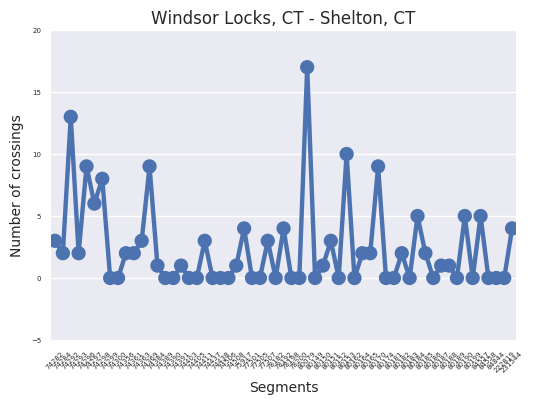

In [152]:
plt.show()

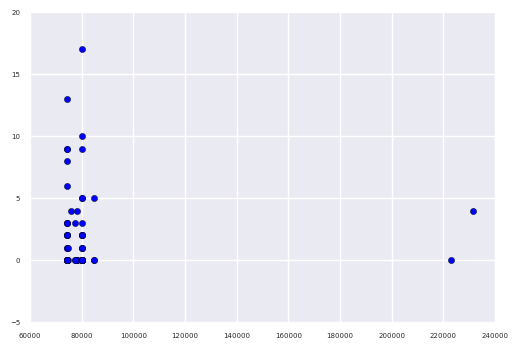

In [155]:
import matplotlib as mt
plt.scatter(crossings_to_plot["Segment"],crossings_to_plot["Number of crossings"])
plt.show()